# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Collection and Preprocessing

In [2]:
df = pd.read_csv("Breast_Cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.dtypes.value_counts()

float64    30
int64       1
object      1
Name: count, dtype: int64

In [6]:
df.drop(columns=['id'],inplace=True)

In [7]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['diagnosis'] = label.fit_transform(df['diagnosis'])
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [10]:
counts =df['diagnosis'].value_counts()
counts

diagnosis
0    357
1    212
Name: count, dtype: int64

0 - benign
1 - malignant

# Distribution of the Target Values

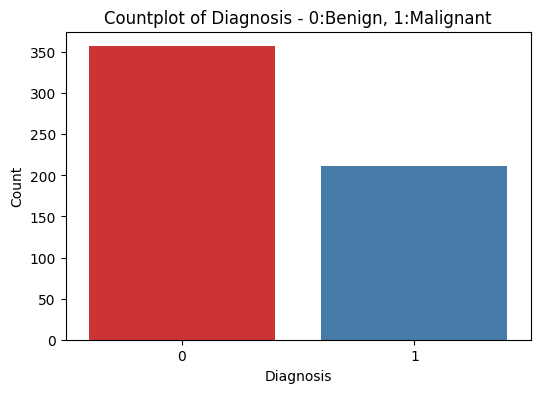

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=df,  palette='Set1')
plt.title('Countplot of Diagnosis - 0:Benign, 1:Malignant')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Boxplot to detect outliers

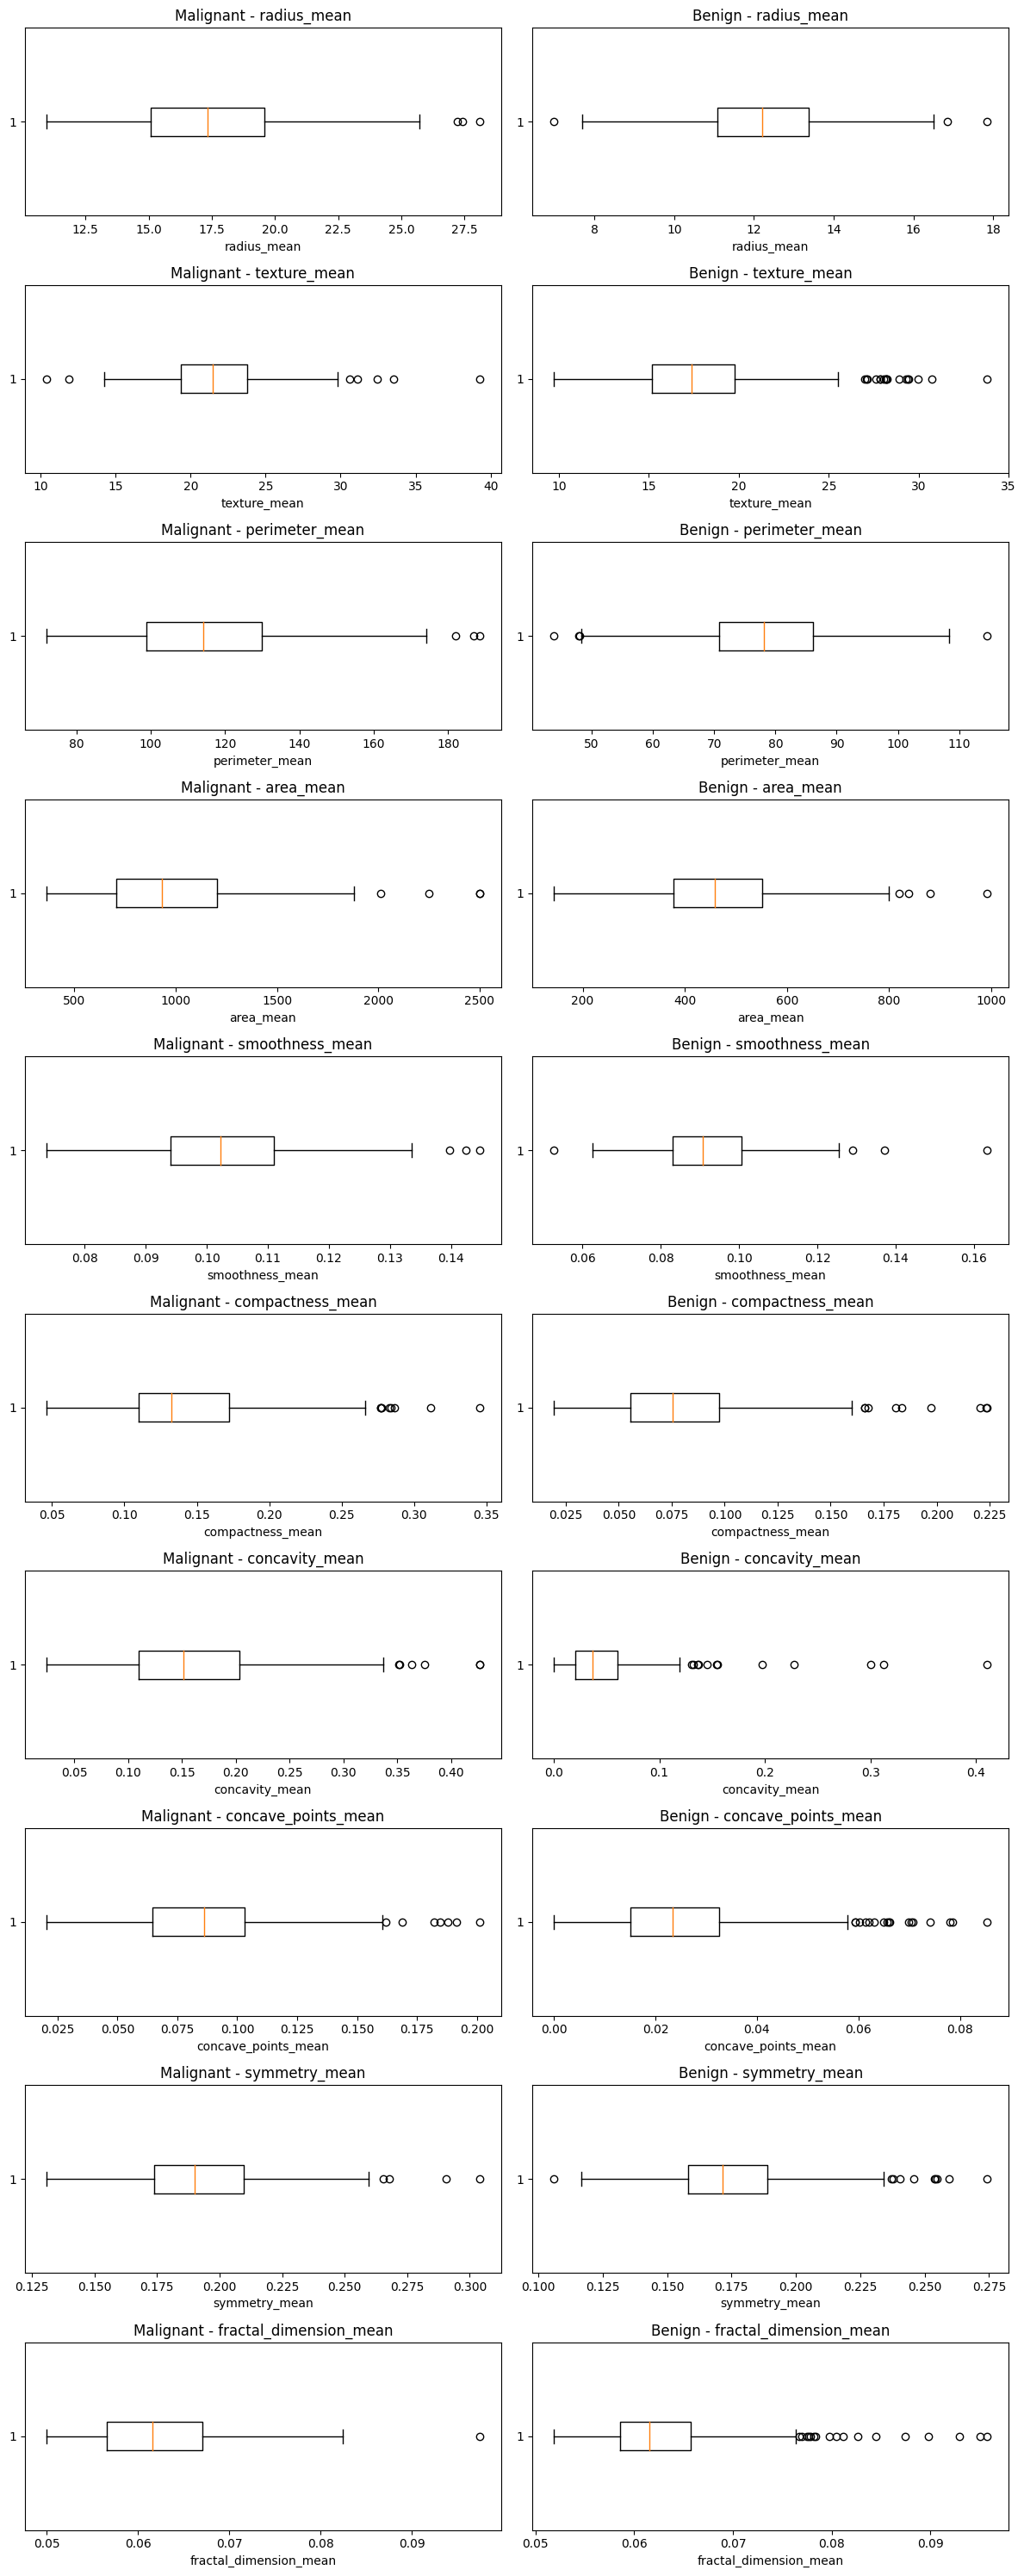

In [12]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
            'smoothness_mean', 'compactness_mean', 'concavity_mean', 
            'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']

fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize=(12, 30))

for i, feature in enumerate(features):
    # Plot for malignant (column 0)
    axes[i, 0].boxplot(df[df['diagnosis'] == 1][feature], vert=False)
    axes[i, 0].set_title('Malignant - {}'.format(feature))
    axes[i, 0].set_xlabel(feature)
    
    # Plot for benign (column 1)
    axes[i, 1].boxplot(df[df['diagnosis'] == 0][feature], vert=False)
    axes[i, 1].set_title('Benign - {}'.format(feature))
    axes[i, 1].set_xlabel(feature)

plt.tight_layout()
plt.show()


<Axes: >

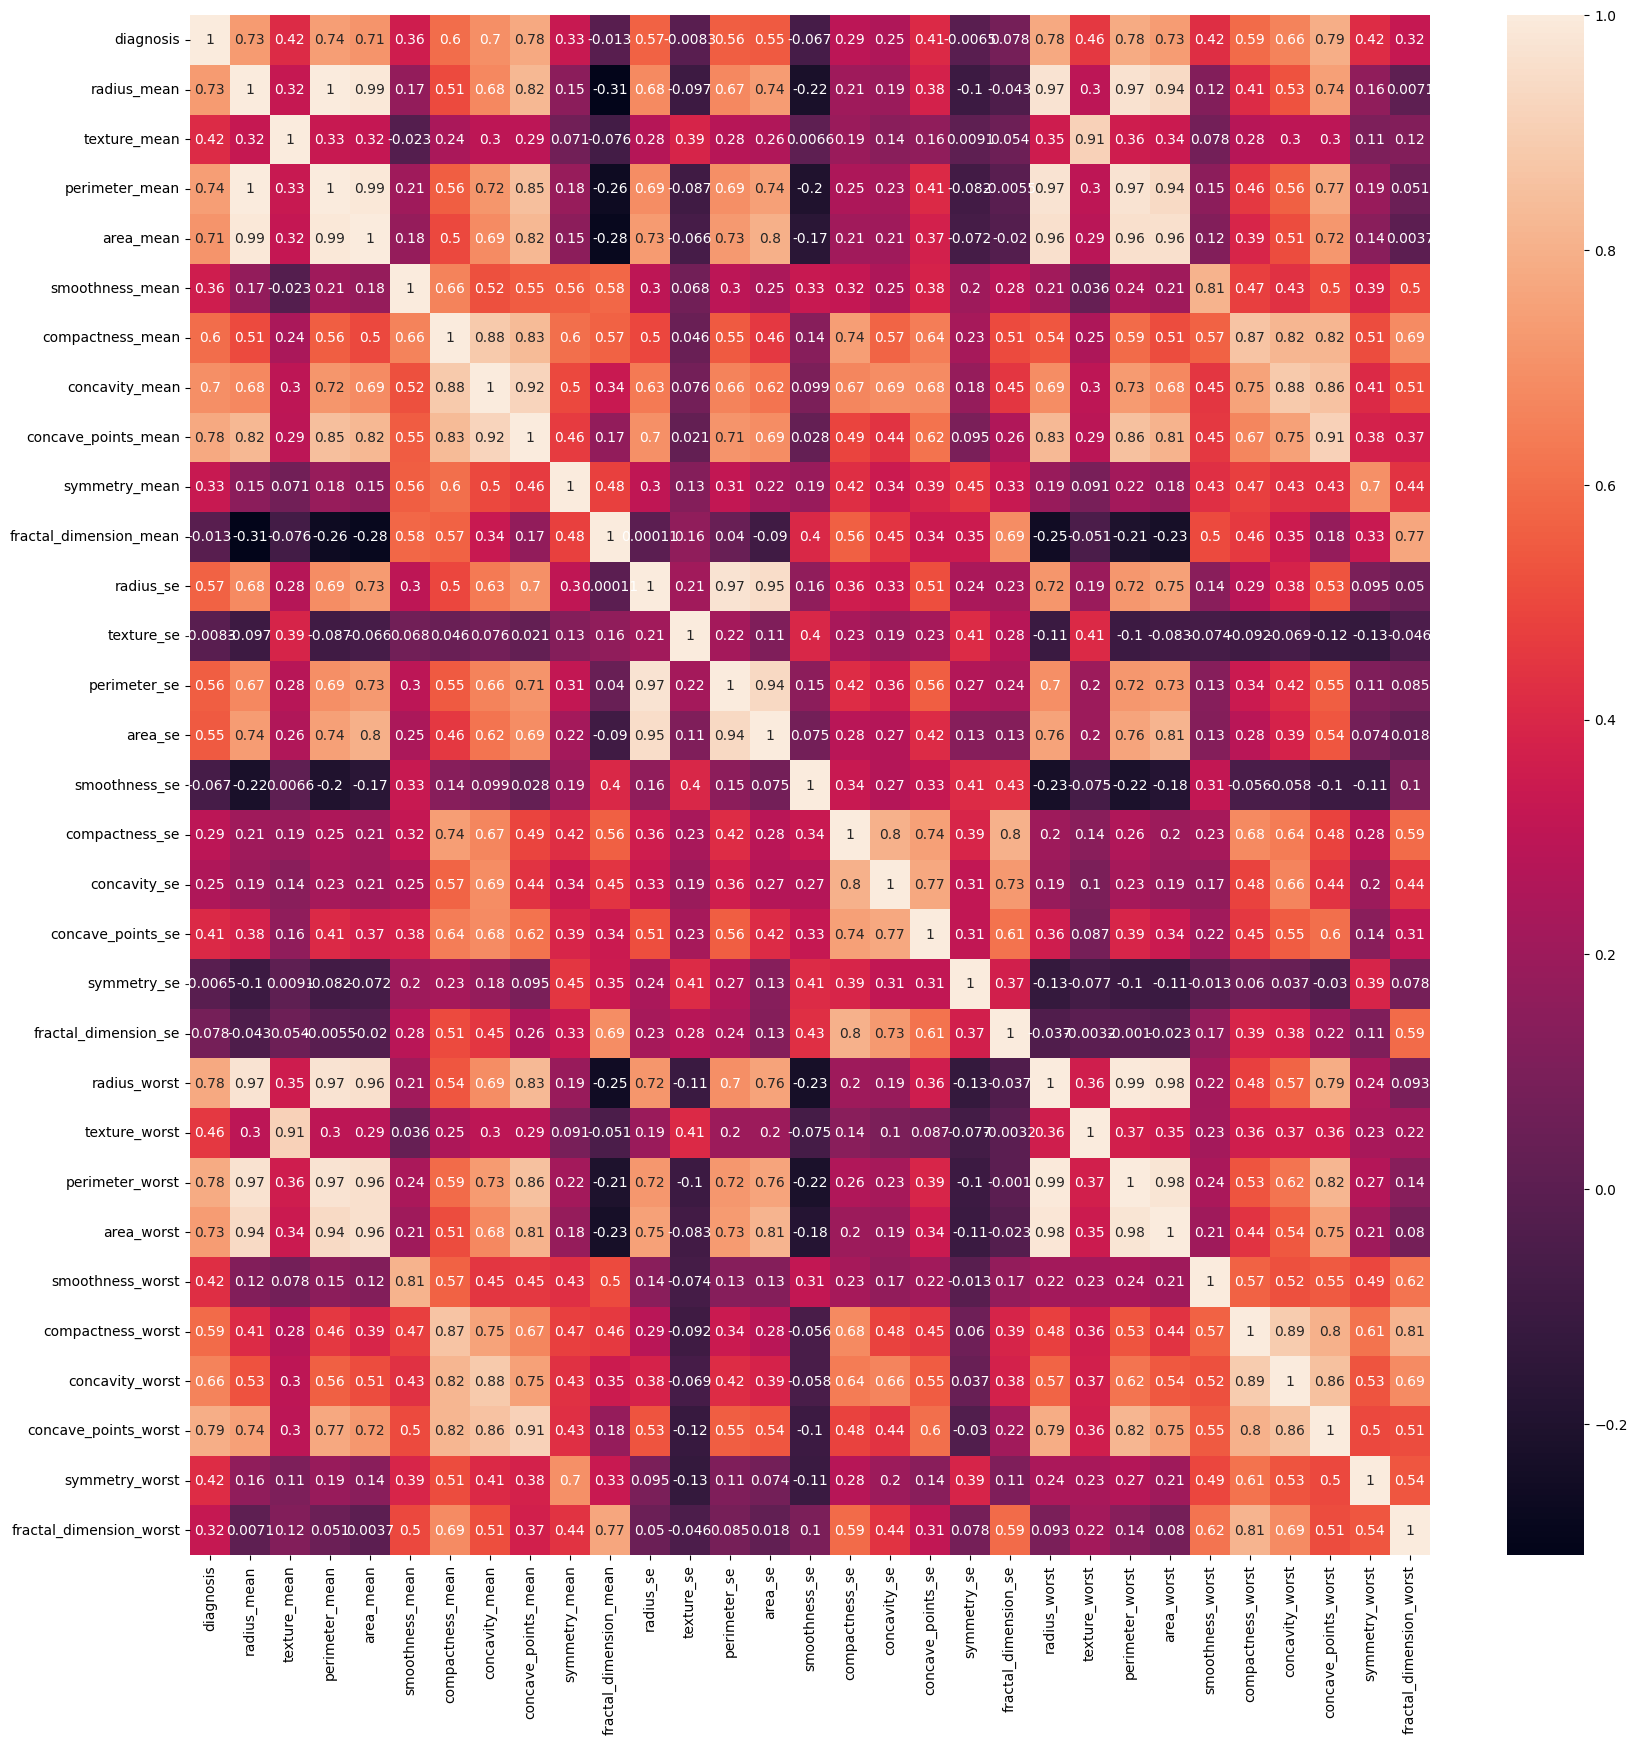

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:].corr(), annot=True)

In [14]:
correlation_matrix = df.corr()

correlation_with_target = correlation_matrix['diagnosis'].abs().sort_values(ascending=False)

top_correlated_features = correlation_with_target[1:11]
print("Top correlated features:\n", top_correlated_features)

Top correlated features:
 concave_points_worst    0.793566
perimeter_worst         0.782914
concave_points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64


Diagnosis has positive correlation with all features.<br>
Multi-collinearity is present. we can derive that (radius, perimeter and area) and (compactness, concavity and concave_points) have a high multi-collinearity. So we can choose one out of these from both sets. <br>
We can drop columns having '_worst' so as to eliminate redundancy

# Feature Selection

In [15]:
columns_to_drop = [col for col in df.columns if any(word in col.lower() for word in ['perimeter', 
                                                                                     'area', 'concavity', 'concave_points'])]

df.drop(columns=columns_to_drop, inplace=True)

In [16]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

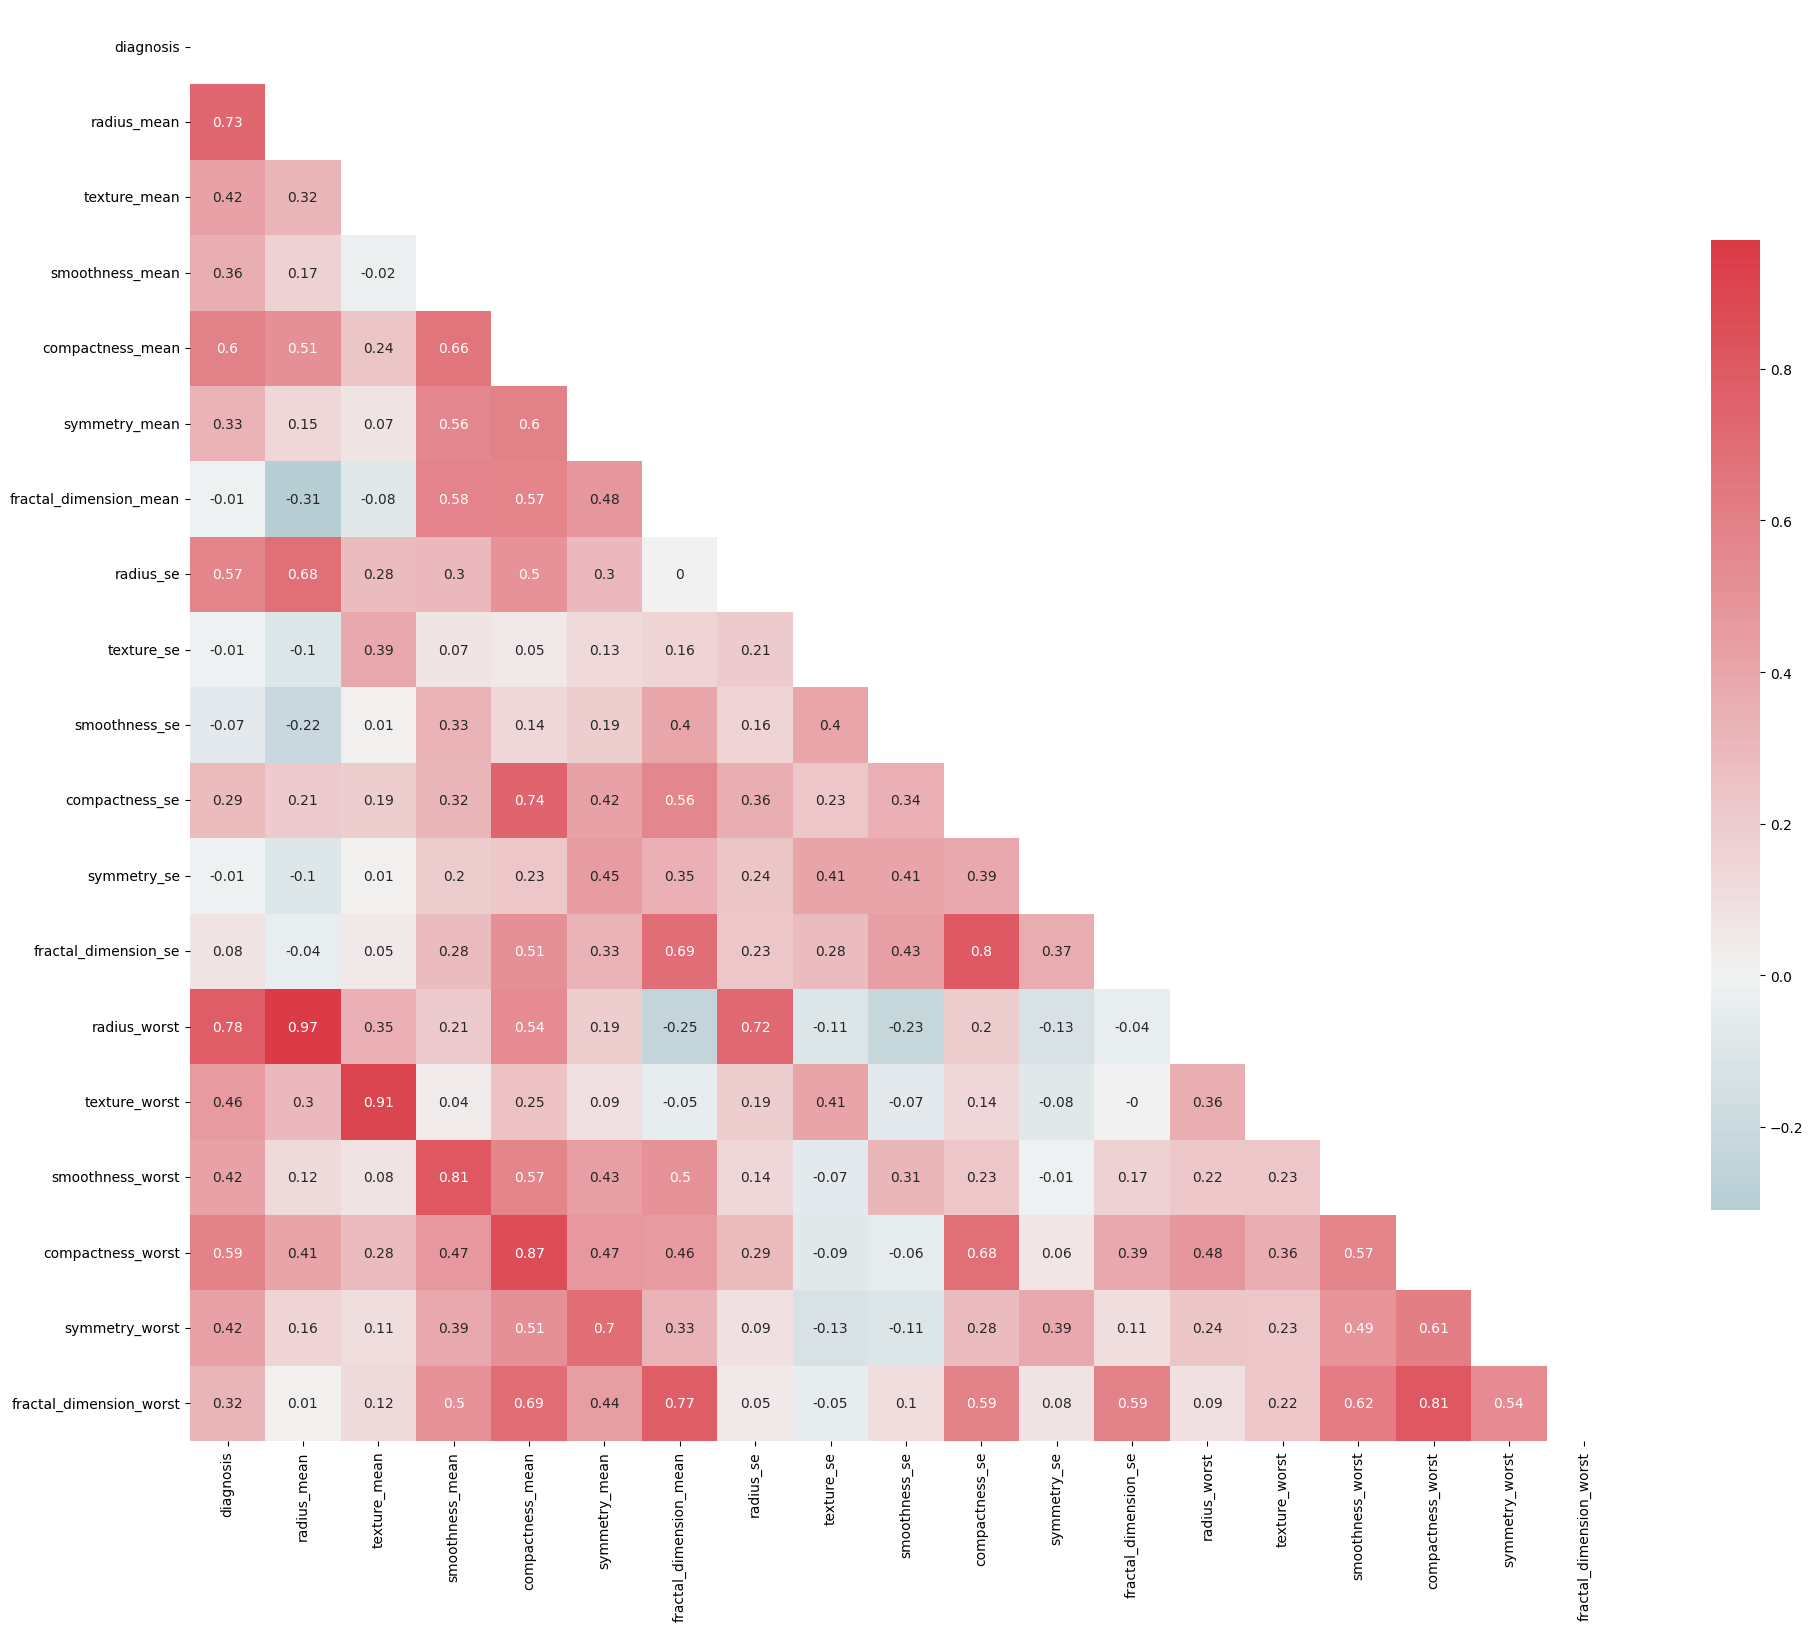

In [17]:
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
           square=True, cbar_kws={'shrink': .5}, annot=True)
plt.tight_layout()

In [18]:
df.shape

(569, 19)

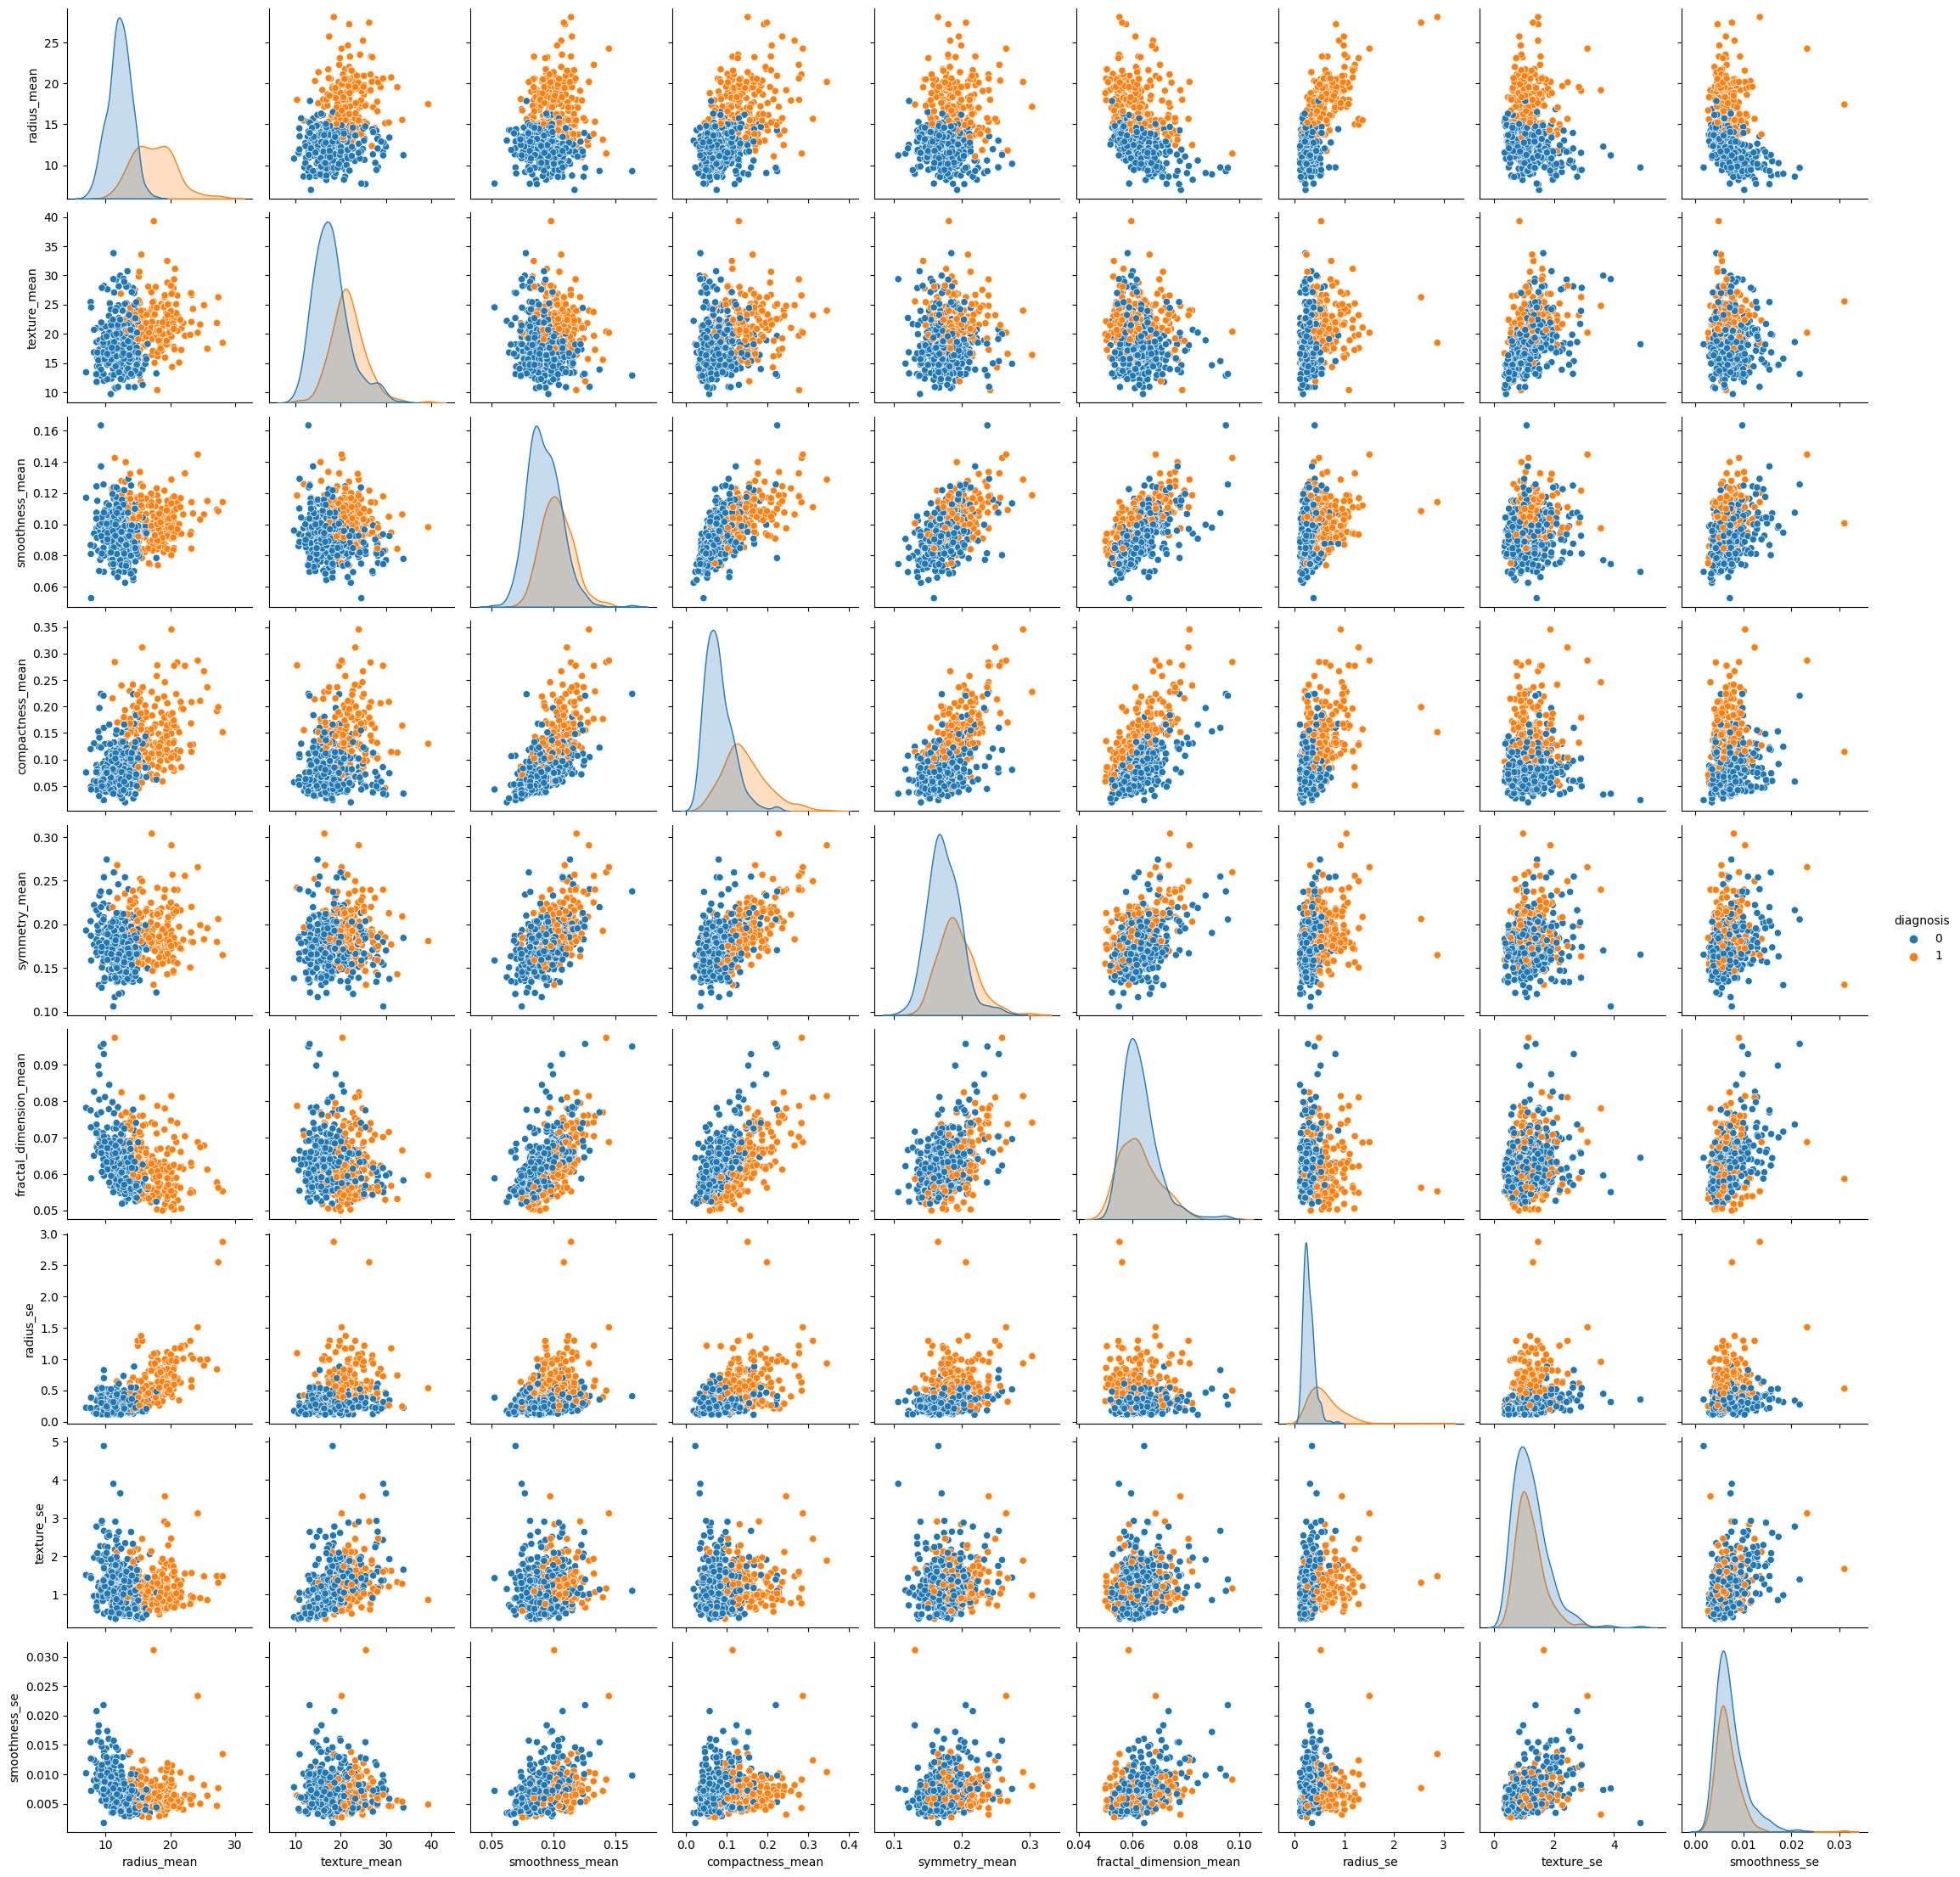

In [19]:
sns.pairplot(df.iloc[:,0:10], hue='diagnosis')

The pairplot suggests that <b>Support Vector Machines (SVM)</b> or linear regression can be a viable choice for classification tasks due to potential separability between different classes or groups of data points.

In [20]:
X = df.drop(columns=['diagnosis'], axis=1)
y=df['diagnosis']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

# Feature Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Model 

In [23]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [24]:
y_pred = model.predict(X_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9766081871345029
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       115
           1       0.98      0.95      0.96        56

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



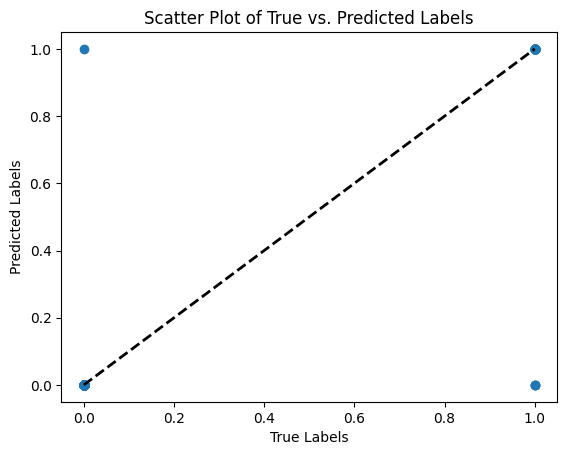

In [26]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Scatter Plot of True vs. Predicted Labels')
plt.show()

In [27]:
print("y_test:", y_test[:10])
print("y_pred:", y_pred[:10])

y_test: 295    0
16     1
431    0
453    0
15     1
275    0
462    0
106    0
157    0
120    0
Name: diagnosis, dtype: int32
y_pred: [0 1 0 0 1 0 0 0 0 0]


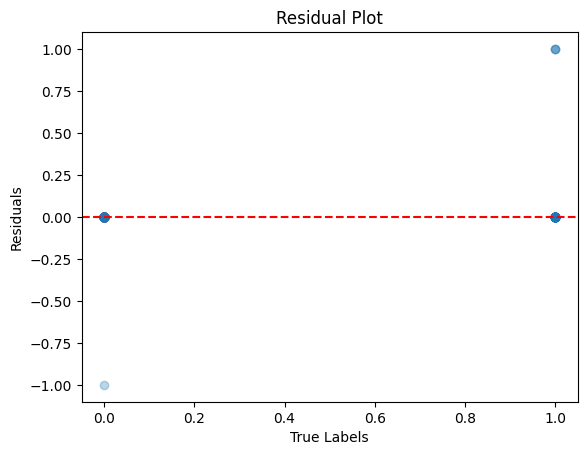

In [28]:
y_pred = np.array(y_pred)
y_test = np.array(y_test)

residuals = y_test.flatten() - y_pred

# residuals vs true labels
plt.scatter(y_test, residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('True Labels')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

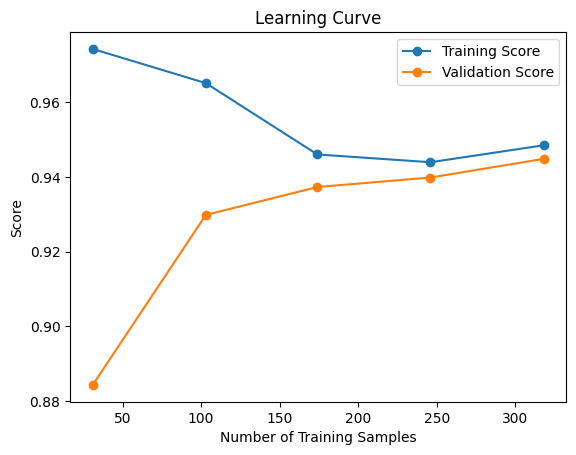

In [29]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
plt.plot(train_sizes, val_scores_mean, 'o-', label='Validation Score')
plt.xlabel('Number of Training Samples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()